In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import initializers
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

2023-01-19 14:07:00.807509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 14:07:01.032077: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-19 14:07:01.032133: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-19 14:07:01.967213: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-1

In [2]:
#task 1 - imager generation
mnist = pd.read_csv('/home/kali/Downloads/fashion-mnist_train.csv')
x_train = mnist.drop('label',axis=1)
x_train=x_train.values
print(x_train.shape)

(60000, 784)


In [3]:
x_train=x_train.reshape(-1,28,28,1)
print(x_train.shape)

(60000, 28, 28, 1)


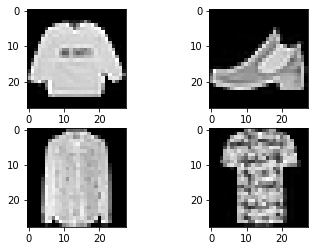

In [4]:
fig,axe=plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(x_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [5]:
x_train = x_train.astype('float32')
x_train = x_train/255
x_train = x_train*2 - 1.
model_generator = Sequential()
model_generator.add(Dense(512,input_shape=[100]))
model_generator.add(LeakyReLU(alpha=0.2))
model_generator.add(BatchNormalization(momentum=0.8))
model_generator.add(Dense(256))
model_generator.add(LeakyReLU(alpha=0.2))
model_generator.add(BatchNormalization(momentum=0.8))
model_generator.add(Dense(128))
model_generator.add(LeakyReLU(alpha=0.2))
model_generator.add(BatchNormalization(momentum=0.8))
model_generator.add(Dense(784))
model_generator.add(Reshape([28,28,1]))

2023-01-19 14:07:07.960631: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-19 14:07:07.960671: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-19 14:07:07.960690: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kali): /proc/driver/nvidia/version does not exist
2023-01-19 14:07:07.960995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model_discriminator = Sequential()
model_discriminator.add(Dense(1,input_shape=[28,28,1]))
model_discriminator.add(Flatten())
model_discriminator.add(Dense(256))
model_discriminator.add(LeakyReLU(alpha=0.2))
model_discriminator.add(Dropout(0.5))
model_discriminator.add(Dense(128))
model_discriminator.add(LeakyReLU(alpha=0.2))
model_discriminator.add(Dropout(0.5))
model_discriminator.add(Dense(64))
model_discriminator.add(LeakyReLU(alpha=0.2))
model_discriminator.add(Dropout(0.5))
model_discriminator.add(Dense(1,activation='sigmoid'))

In [7]:
GAN =Sequential([model_generator,model_discriminator])
model_discriminator.compile(optimizer='adam',loss='binary_crossentropy')
model_discriminator.trainable = False
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [8]:
epochs = 100
batch_size = 64
noise_shape=100

Epoch 1
1/1 [==============================] - 0s 39ms/step


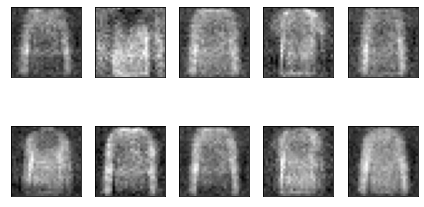

Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
1/1 [==============================] - 0s 43ms/step


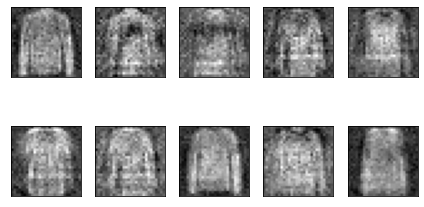

Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
1/1 [==============================] - 0s 32ms/step


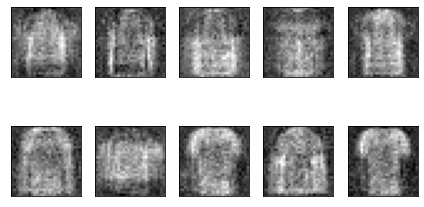

Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
1/1 [==============================] - 0s 33ms/step


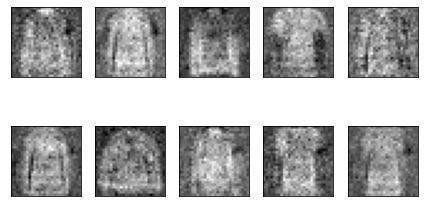

Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41


KeyboardInterrupt: 

In [12]:
for epoch in range(epochs):
    print(f"Epoch {epoch+1}")
    for i in range(x_train.shape[0]//batch_size):  
        noise=np.random.normal(0, 1, size=[batch_size,noise_shape])  
        generate_image = model_generator.predict_on_batch(noise)   
        train_dataset = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        train_label=np.ones(shape=(batch_size,1))
        model_discriminator.trainable = True
        d_loss_real=model_discriminator.train_on_batch(train_dataset,train_label)
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=model_discriminator.train_on_batch(generate_image,train_label)
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        model_discriminator.trainable = False
        d_g_loss_batch = GAN.train_on_batch(noise, train_label)        
    if epoch % 10 == 0:
        samples = 10
        x_fake = model_generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))
        for n in range(samples):
            plt.subplot(2, 5, n+1)
            plt.imshow(x_fake[n].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout()
        plt.show()        
noise=np.random.normal(size=[10,noise_shape])
generate_image = model_generator.predict(noise)

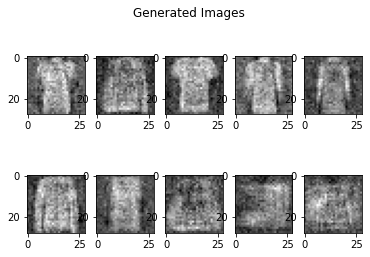

In [16]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images')
idx=0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(generate_image[idx],cmap='gray')
         idx+=1